In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read file from system:

df= pd.read_csv(r'/content/Churn.csv')
df


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,29.85,No
1,Male,0,No,34,Yes,No,DSL,One year,56.95,No
2,Male,0,No,2,Yes,No,DSL,Month-to-month,53.85,Yes
3,Male,0,No,45,No,No,DSL,One year,42.30,No
4,Female,0,No,2,Yes,No,Fiber optic,Month-to-month,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,24,Yes,Yes,DSL,One year,84.80,No
7039,Female,0,Yes,72,Yes,Yes,Fiber optic,One year,103.20,No
7040,Female,0,Yes,11,No,No,DSL,Month-to-month,29.60,No
7041,Male,1,No,4,Yes,Yes,Fiber optic,Month-to-month,74.40,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   Contract         7043 non-null   object 
 8   MonthlyCharges   7043 non-null   float64
 9   Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB


In [ ]:
df.isnull().sum()

gender             0
SeniorCitizen      0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
Contract           0
MonthlyCharges     0
Churn              0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data = df.copy()

In [ ]:
data

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,29.85,No
1,Male,0,No,34,Yes,No,DSL,One year,56.95,No
2,Male,0,No,2,Yes,No,DSL,Month-to-month,53.85,Yes
3,Male,0,No,45,No,No,DSL,One year,42.30,No
4,Female,0,No,2,Yes,No,Fiber optic,Month-to-month,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,24,Yes,Yes,DSL,One year,84.80,No
7039,Female,0,Yes,72,Yes,Yes,Fiber optic,One year,103.20,No
7040,Female,0,Yes,11,No,No,DSL,Month-to-month,29.60,No
7041,Male,1,No,4,Yes,Yes,Fiber optic,Month-to-month,74.40,Yes


In [ ]:
# Variable encoding:
# Use binary encoding for gender, Phone services, MultipleLines, InternetService and churn values due to have only two categorical values:

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['InternetService'] = df['InternetService'].map({'DSL': 0, 'Fiber optic': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,1,0,0,1,0,0,0,Month-to-month,29.85,0
1,0,0,0,34,1,0,0,One year,56.95,0
2,0,0,0,2,1,0,0,Month-to-month,53.85,1
3,0,0,0,45,0,0,0,One year,42.30,0
4,1,0,0,2,1,0,1,Month-to-month,70.70,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,24,1,1,0,One year,84.80,0
7039,1,0,1,72,1,1,1,One year,103.20,0
7040,1,0,1,11,0,0,0,Month-to-month,29.60,0
7041,0,1,0,4,1,1,1,Month-to-month,74.40,1


In [ ]:
# varibale encoding:
# Lable encoding for Contract variable due to have more than two values:

df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

df


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,1,0,0,1,0,0,0,0,29.85,0
1,0,0,0,34,1,0,0,1,56.95,0
2,0,0,0,2,1,0,0,0,53.85,1
3,0,0,0,45,0,0,0,1,42.30,0
4,1,0,0,2,1,0,1,0,70.70,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,24,1,1,0,1,84.80,0
7039,1,0,1,72,1,1,1,1,103.20,0
7040,1,0,1,11,0,0,0,0,29.60,0
7041,0,1,0,4,1,1,1,0,74.40,1


# EDA

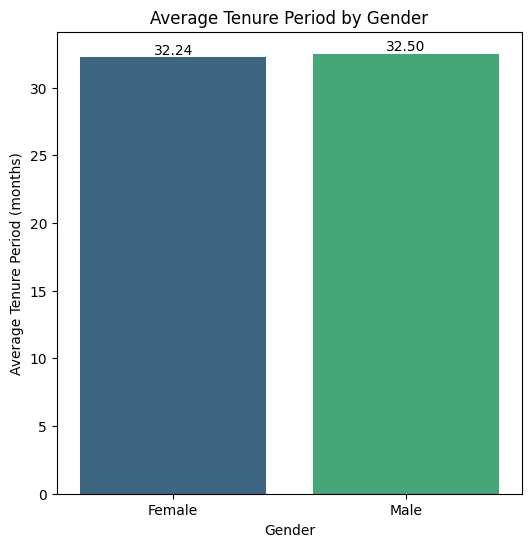

In [ ]:
# Perform EDA on without encoding dataset:

# comparison of gender according to thier tenure:

plt.figure(figsize=(6, 6))
sns.barplot(x='gender', y='tenure', data = data, estimator=np.mean, palette='viridis', ci=None)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Tenure Period by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Tenure Period (months)')
plt.show()


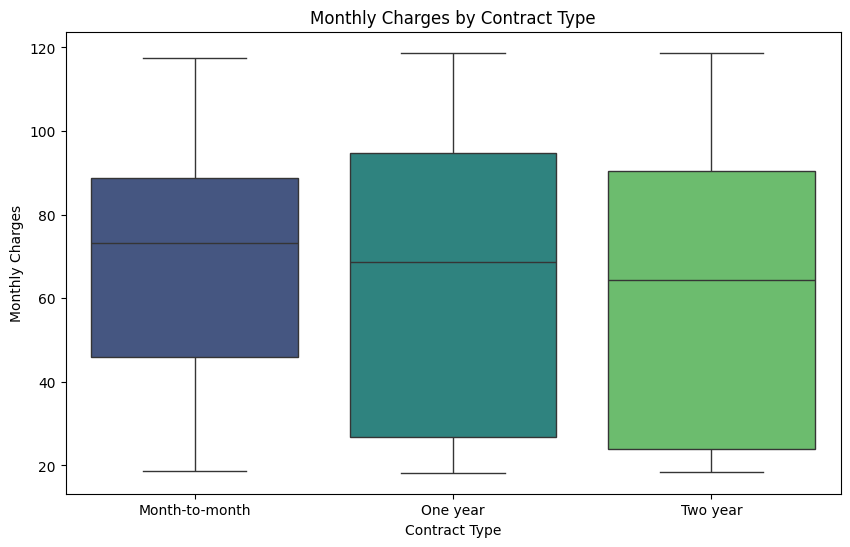

In [ ]:
# relationship between monthly charges and contract:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', data = data, palette='viridis')
plt.title('Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()

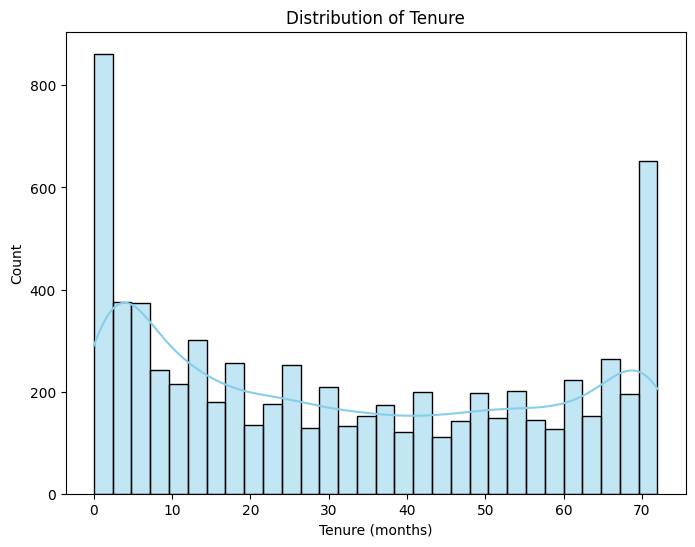

In [ ]:
# histogram for knowing distribution of tenure

plt.figure(figsize=(8, 6))
sns.histplot(data['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

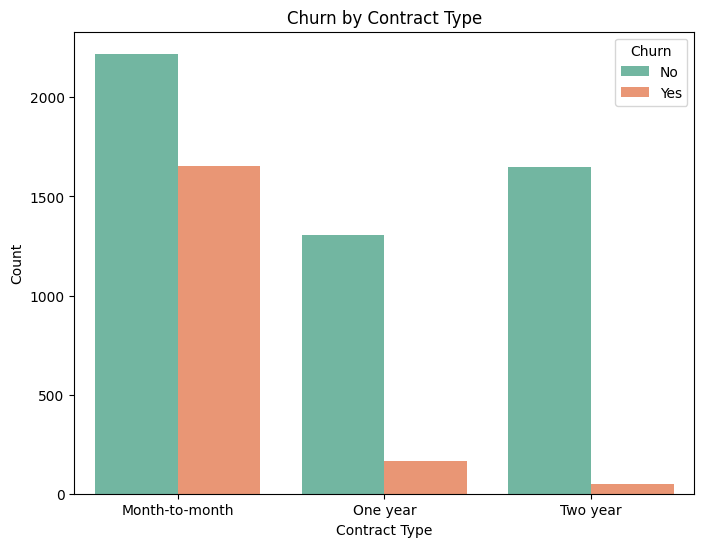

In [ ]:
# Plotting churn by contract type
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


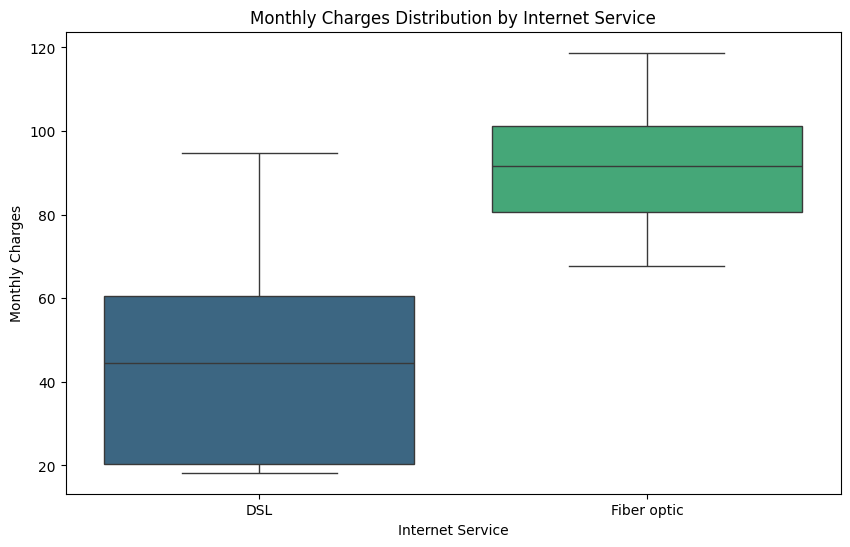

In [ ]:
# Plotting monthly charges distribution by internet service
plt.figure(figsize=(10, 6))
sns.boxplot(x='InternetService', y='MonthlyCharges', data=data, palette='viridis')
plt.title('Monthly Charges Distribution by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charges')
plt.show()


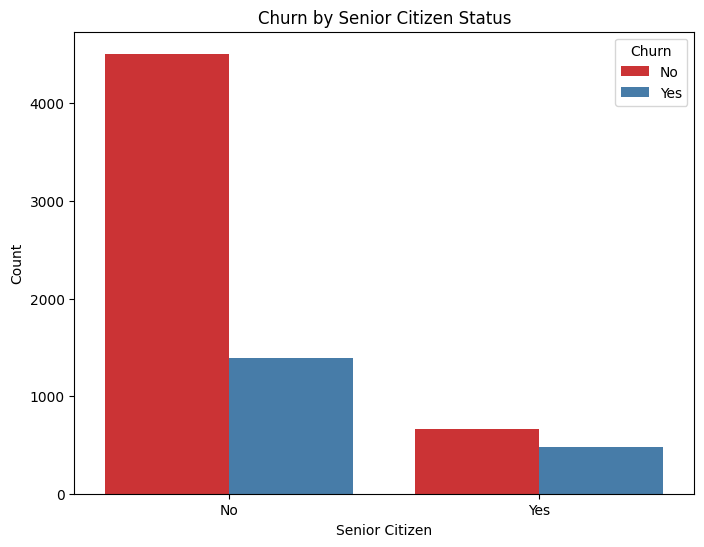

In [ ]:
# Plotting churn behavior among senior citizens
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data, palette='Set1')
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


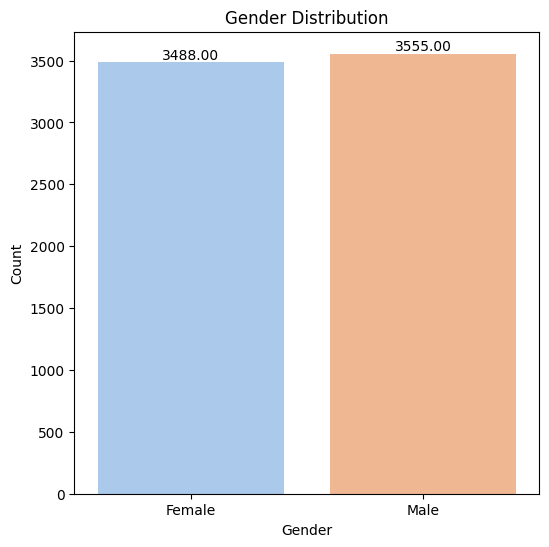

In [ ]:
# Plotting gender distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='gender', data=data, palette='pastel')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [ ]:
df

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,1,0,0,1,0,0,0,0,29.85,0
1,0,0,0,34,1,0,0,1,56.95,0
2,0,0,0,2,1,0,0,0,53.85,1
3,0,0,0,45,0,0,0,1,42.30,0
4,1,0,0,2,1,0,1,0,70.70,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,24,1,1,0,1,84.80,0
7039,1,0,1,72,1,1,1,1,103.20,0
7040,1,0,1,11,0,0,0,0,29.60,0
7041,0,1,0,4,1,1,1,0,74.40,1


In [ ]:
# Define x and y variable for clustering:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [ ]:
X.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges
0,1,0,0,1,0,0,0,0,29.85
1,0,0,0,34,1,0,0,1,56.95
2,0,0,0,2,1,0,0,0,53.85
3,0,0,0,45,0,0,0,1,42.30
4,1,0,0,2,1,0,1,0,70.70


# clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
pip install --upgrade scikit-learn threadpoolctl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 70.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


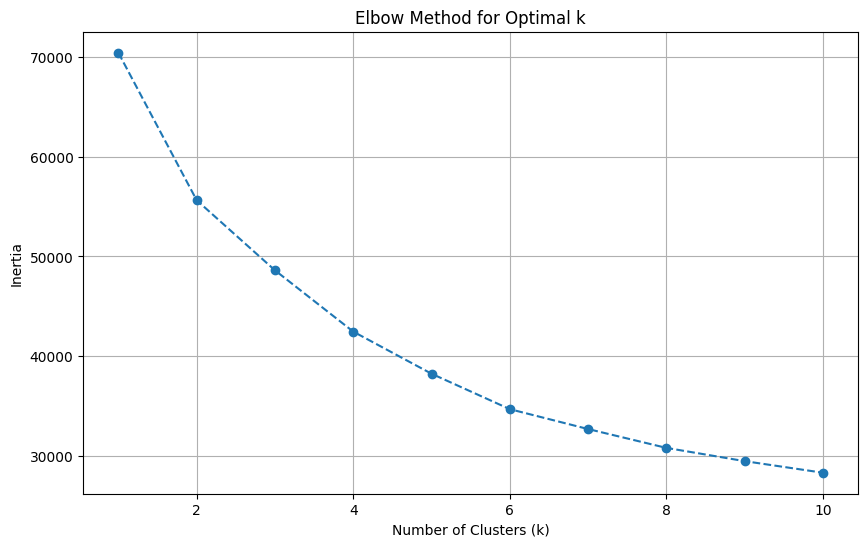

In [ ]:
# Standardize the data and plotting the Elbow curve
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [ ]:
# K-mean clustering:
# defining k-means cluster value by optimize elbow curve:
k = 2

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)


# Get cluster labels and silhouette score
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_data, cluster_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")
print("Cluster Centers:\n", scaler.inverse_transform(kmeans.cluster_centers_))


Silhouette Score for 2 clusters: 0.206
Cluster Centers:
 [[5.04714016e-01 2.79384035e-01 2.08988058e-01 3.30147706e+01
  1.00000000e+00 6.35135135e-01 9.72344437e-01 4.55688246e-01
  9.09389221e+01 4.21433061e-01]
 [4.87438487e-01 6.55270655e-02 3.74255374e-01 3.18407148e+01
  8.23361823e-01 2.46050246e-01 5.18000518e-04 8.83967884e-01
  4.31880212e+01 1.36752137e-01]]


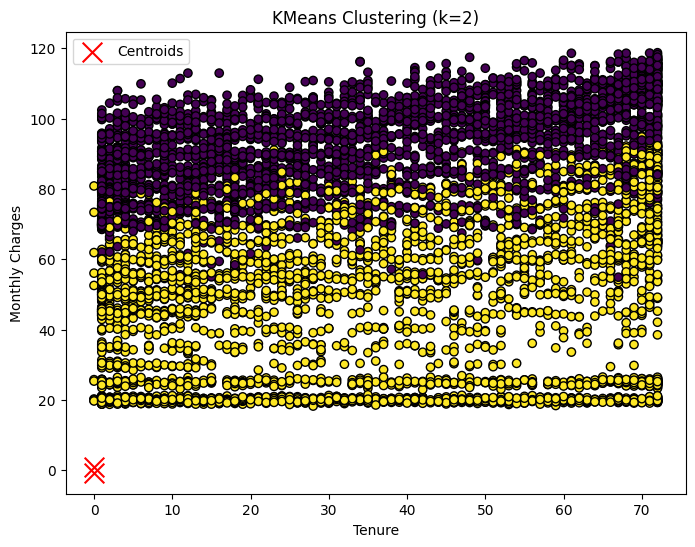

In [ ]:
# Plot clusters based on 'tenure' and 'MonthlyCharges'

plt.figure(figsize=(8, 6))
plt.scatter(df['tenure'], df['MonthlyCharges'], c=clusters, cmap='viridis', edgecolors='k')
plt.title('KMeans Clustering (k=2)')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, df.columns.get_loc('tenure')], centroids[:, df.columns.get_loc('MonthlyCharges')],
            marker='x', s=200, color='red', label='Centroids')
plt.legend()

plt.show()


# Artificial Neural Network

In [ ]:
pip install tensorflow

In [ ]:
# import important libraries for ANN model:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the ANN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/50
177/177 [==============================] - 6s 17ms/step - loss: 0.5159 - accuracy: 0.7291 - val_loss: 0.4135 - val_accuracy: 0.8027
Epoch 2/50
177/177 [==============================] - 1s 8ms/step - loss: 0.4469 - accuracy: 0.7792 - val_loss: 0.4072 - val_accuracy: 0.8027
Epoch 3/50
177/177 [==============================] - 1s 6ms/step - loss: 0.4428 - accuracy: 0.7843 - val_loss: 0.4048 - val_accuracy: 0.8055
Epoch 4/50
177/177 [==============================] - 1s 7ms/step - loss: 0.4418 - accuracy: 0.7882 - val_loss: 0.4059 - val_accuracy: 0.8034
Epoch 5/50
177/177 [==============================] - 1s 6ms/step - loss: 0.4358 - accuracy: 0.7906 - val_loss: 0.4054 - val_accuracy: 0.8070
Epoch 6/50
177/177 [==============================] - 1s 7ms/step - loss: 0.4341 - accuracy: 0.7913 - val_loss: 0.4050 - val_accuracy: 0.7991
Epoch 7/50
177/177 [==============================] - 1s 6ms/step - loss: 0.4334 - accuracy: 0.7922 - val_loss: 0.4043 - val_accuracy: 0.8013
Epoch

In [ ]:
# Calculating Accuracy of model:

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict using the scaled test data
y_pred = model.predict(X_test_scaled)

# Convert probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Analyze model predictions with classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

45/45 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.8020
Test Accuracy: 0.8020
45/45 [==============================] - 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
[[944  92]
 [187 186]]


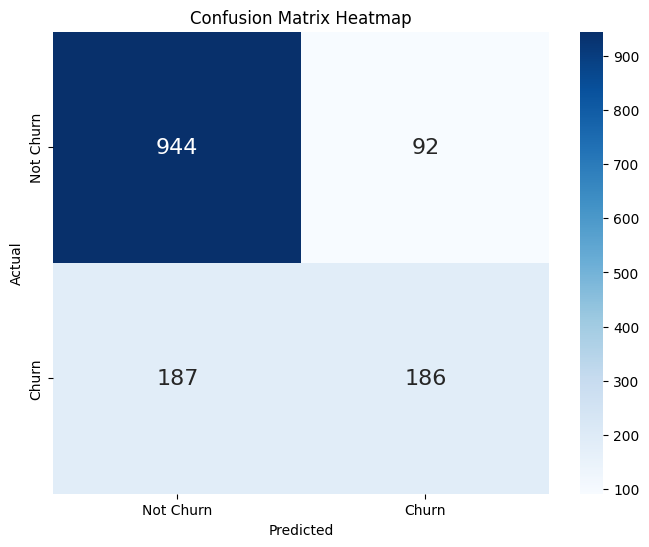

In [ ]:
# making cofusion matrix:

cm = confusion_matrix(y_test, y_pred_binary)
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16},
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
